<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/Association_rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign 6: MissingValue/MissForest.xlsx')
df.head()

,Unnamed: 0,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,...,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation
0,0,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,...,5.8998,256.67,91.0,5.559,215.0,81.0,123.0,99.0,65.810,1
1,1,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,...,5.6377,260.39,86.0,5.489,219.0,64.0,146.0,73.0,105.881,1
2,2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,...,9.4100,313.00,100.0,5.300,193.0,62.0,129.0,65.0,51.688,1
3,3,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,...,4.9215,206.32,89.0,5.414,205.0,69.0,139.0,76.0,20.270,1
4,4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:54.580,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,...,5.4200,434.00,88.0,5.500,198.0,74.0,129.0,60.0,47.001,1


In [23]:
df.columns

Index(['Unnamed: 0', 'PatientUID', 'PatientVisitUID', 'Slopes', 'InPatient',
       'OutPatient', 'Emergency', 'time_t1', 'eGFR_t1', 'VisitLocation',
       'StartDTTM', 'EndDttm', 'LabCwhen', 'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent', 'Sex', 'Age', 'NATNL', 'BMI',
       'BSA', 'Diastolic-BP', 'Systolic-BP', 'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
  

In [3]:
df.shape

(52620, 83)

In [10]:
selected_columns = ['Slopes', 'InPatient',
       'OutPatient', 'Emergency', 'eGFR_t1', 'VisitLocation',
       'G1M2-ARB', 'G3M1-Statin','G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent', 'Sex', 'Age', 'NATNL', 'BMI',
       'BSA', 'Diastolic-BP', 'Systolic-BP', 'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy', 'L1-eGFR', 'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
df_selected = df[selected_columns]

In [11]:
df_selected.shape

(52620, 75)

In [14]:
df_selected.describe()

,Slopes,InPatient,OutPatient,Emergency,eGFR_t1,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,...,L13-Hematocrit,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio
count,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,...,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000
mean,-2.169255,0.088027,0.868890,0.043082,53.188739,8.887628,30.067104,1.047681,2.593330,8.862657,...,38.172119,7.348815,247.545125,119.736052,6.519799,176.179781,140.731462,112.039863,51.919348,88.828862
std,9.785498,0.283337,0.337524,0.203045,16.696552,27.112374,43.033413,8.089661,14.695136,26.546391,...,5.045065,3.035374,79.127452,45.869497,1.426300,40.097419,71.956435,36.031475,12.056825,66.316006
min,-79.002653,0.000000,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,10.000000,-37.200000,29.000000,20.000000,1.000000,4.000000,0.000000
25%,-6.381052,0.000000,1.000000,0.000000,43.810000,0.000000,0.000000,0.000000,0.000000,0.000000,...,35.400000,5.980775,204.890000,93.350000,5.609000,153.000000,101.450000,89.000000,45.450000,44.046000
50%,-1.706494,0.000000,1.000000,0.000000,54.660000,0.000000,0.000000,0.000000,0.000000,0.000000,...,38.600000,7.026250,242.000000,105.380000,6.027000,174.430000,124.000000,110.785000,51.530000,76.297000
75%,2.488436,0.000000,1.000000,0.000000,63.220000,0.000000,70.000000,0.000000,0.000000,0.000000,...,41.691250,8.200000,282.430000,131.000000,7.000000,193.000000,160.930000,127.570000,57.000000,117.864500
max,106.892857,1.000000,1.000000,1.000000,142.900000,365.000000,400.000000,200.000000,252.000000,285.000000,...,67.000000,296.900000,2282.000000,989.000000,24.200000,865.000000,2191.000000,693.000000,196.000000,2360.000000


##แบ่งข้อมูล

###แบ่งช่วงข้อมูลตาม Age Column

In [15]:
import pandas as pd

def binning(col, cut_points, labels=None):
    minval = col.min()
    maxval = col.max()
    cut_points = sorted(set(cut_points))
    break_points = [minval] + cut_points + [maxval]
    if not labels:
        labels = range(len(cut_points) + 1)
    colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True, duplicates='drop')
    return colBin

# Example cut points and labels
cut_points = [18, 35, 60]
labels = ['early_adulthood', 'middle_adulthood','later_maturity']

# Assuming df_selected is your DataFrame and 'Age' is a column in it
# Replace df_selected['Age'] with your actual column name if different
df_selected['age'] = binning(df_selected['Age'], cut_points, labels)

<ipython-input-15-832eae1385a2>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['age'] = binning(df_selected['Age'], cut_points, labels)


###แบ่งช่วงข้อมูลตาม Slope Column

In [16]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตาม Slopes
def categorize_slope(slope):
    if slope >-0.5:
        return 'better'
    else:
        return 'worse'

# Assuming df_selected is your DataFrame and 'Age' is a column in it
# Replace df_selected['Age'] with your actual column name if different
df_selected['slope_Category'] = df_selected['Slopes'].apply(categorize_slope)

<ipython-input-16-571829e09601>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['slope_Category'] = df_selected['Slopes'].apply(categorize_slope)


### แบ่งช่วงข้อมูลตาม  eGFR_t1 & L1-eGFR Column

In [17]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตามระดับ 'Recent_eGFR'
def categorize_eGFR(eGFR_value):
    if eGFR_value >= 90:
        return 'stage 1'
    elif 89.99 >= eGFR_value >= 60:
        return 'stage 2'
    elif 59.99 >= eGFR_value >= 45:
        return 'stage 3a'
    elif 44.99 >= eGFR_value >= 30:
        return 'stage 3b'
    elif 29.99 >= eGFR_value >= 15:
        return 'stage 4'
    else:
        return 'stage 5'

# เพิ่มคอลัมน์ 'eGFR_Category' ที่บอกระดับของ 'Recent_eGFR'
df_selected['eGFR_t1_Category'] = df_selected['eGFR_t1'].apply(categorize_eGFR)
df_selected['eGFR_Category'] = df_selected['L1-eGFR'].apply(categorize_eGFR)

<ipython-input-17-f9b2f482afe6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['eGFR_t1_Category'] = df_selected['eGFR_t1'].apply(categorize_eGFR)
<ipython-input-17-f9b2f482afe6>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['eGFR_Category'] = df_selected['L1-eGFR'].apply(categorize_eGFR)


### แบ่งช่วงข้อมูลตาม Systolic BP Column

In [18]:
import pandas as pd

def binning(col, cut_points, labels=None):
    minval = col.min()
    maxval = col.max()
    cut_points = sorted(set(cut_points))
    break_points = [minval] + cut_points + [maxval]
    if not labels:
        labels = range(len(cut_points) + 1)
    colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True, duplicates='drop')
    return colBin

# Example cut points and labels
cut_points = [0, 120, 140, 160]
labels = ['Normal', 'Prehypertension','Hypertension_Stage I','Hypertension_Stage II']

# Assuming df_selected is your DataFrame and 'Age' is a column in it
# Replace df_selected['Age'] with your actual column name if different
df_selected['SBP'] = binning(df_selected['Systolic-BP'], cut_points, labels)

<ipython-input-18-0c977b4d707e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['SBP'] = binning(df_selected['Systolic-BP'], cut_points, labels)


### แบ่งช่วงข้อมูลตาม Diastolic BP Column

In [19]:
import pandas as pd

def binning(col, cut_points, labels=None):
    minval = col.min()
    maxval = col.max()
    cut_points = sorted(set(cut_points))
    break_points = [minval] + cut_points + [maxval]
    if not labels:
        labels = range(len(cut_points) + 1)
    colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True, duplicates='drop')
    return colBin

# Example cut points and labels
cut_points = [0, 80, 90, 100]
labels = ['Normal', 'Prehypertension','Hypertension_Stage I','Hypertension_Stage II']

# Assuming df_selected is your DataFrame and 'Age' is a column in it
# Replace df_selected['Age'] with your actual column name if different
df_selected['DBP'] = binning(df_selected['Diastolic-BP'], cut_points, labels)

<ipython-input-19-32c71d58840d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['DBP'] = binning(df_selected['Diastolic-BP'], cut_points, labels)


### แบ่งช่วงข้อมูลตาม BSA Column

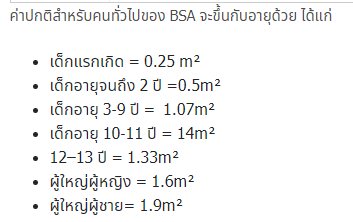

### แบ่งช่วงข้อมูลตาม BMI Column

In [20]:
def interpret_BMI(BMI_value):
    if BMI_value < 18.5:
        return 'below threshold'
    elif 18.5 <= BMI_value <= 22.9:
        return 'normal and proportional'
    elif 23 <= BMI_value <= 24.9:
        return 'overweight'
    elif 25 <= BMI_value <= 29.9:
        return 'Obesity level 1'
    else:
        return 'Obesity level 2'

# เพิ่มคอลัมน์ 'bmi' ที่บอกระดับของ 'interpret_BMI'
df_selected['bmi'] = df_selected['BMI'].apply(interpret_BMI)

<ipython-input-20-c000ed2f2d46>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['bmi'] = df_selected['BMI'].apply(interpret_BMI)


###BUN

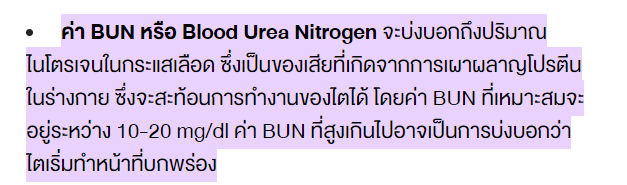

In [27]:
def interpret_BUN(BUN_value):
    if BUN_value <= 20:
        return 'normal'
    else:
        return 'high'

# Add a new column 'bun_level' based on 'BUN' values
df_selected['ฺBUN'] = df_selected['L2-BUN'].apply(interpret_BUN)


###Creatinine

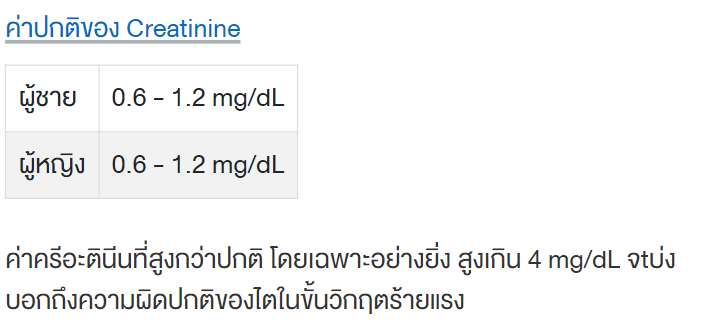

In [29]:
def interpret_Creatinine(Creatinine_value):
    if Creatinine_value <= 1.2:
        return 'normal'
    else:
        return 'high'

# Add a new column 'bun_level' based on 'BUN' values
df_selected['Creatinine'] = df_selected['L3-Creatinine'].apply(interpret_Creatinine)

###Sodium

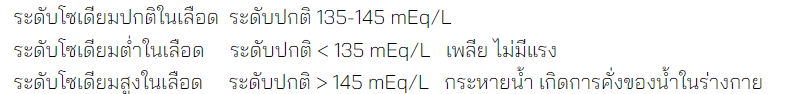

In [31]:
def interpret_sodium(sodium_value):
    if sodium_value < 135:
        return 'Low'
    elif 135 <= sodium_value <= 145:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'sodium_level' based on 'L4-Sodium' values
df_selected['sodium'] = df_selected['L4-Sodium'].apply(interpret_sodium)


###Potassium

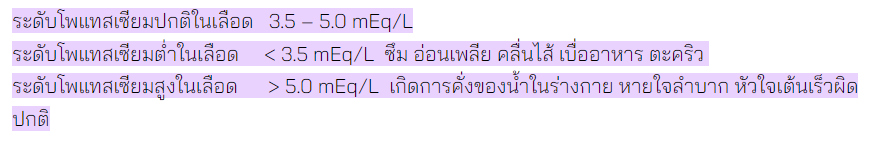

In [32]:
def interpret_potassium(potassium_value):
    if potassium_value < 3.5:
        return 'Low'
    elif 3.5 <= potassium_value <= 5.0:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'potassium_level' based on 'L5-Potassium' values
df_selected['potassium'] = df_selected['L5-Potassium'].apply(interpret_potassium)


###Chloride

In [34]:
def interpret_chloride(chloride_value):
    if chloride_value < 96:
        return 'Low'
    elif 96 <= chloride_value <= 106:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'chloride_level' based on 'L6-Chloride' values
df_selected['chloride'] = df_selected['L6-Chloride'].apply(interpret_chloride)


###Bicarbonate

In [35]:
def interpret_bicarbonate(bicarbonate_value):
    if bicarbonate_value < 20:
        return 'Low'
    elif 20 <= bicarbonate_value <= 30:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'bicarbonate_level' based on 'L7-Bicarbonate' values
df_selected['bicarbonate'] = df_selected['L7-Bicarbonate'].apply(interpret_bicarbonate)


###Uric

In [36]:
def interpret_uric(uric_value):
    if uric_value <= 8.5:
        return 'Normal'
    elif uric_value > 12:
        return 'High'


# Add a new column 'uric_level' based on 'L8-Uric' values
df_selected['uric'] = df_selected['L8-Uric'].apply(interpret_uric)


###Calcium

In [37]:
def interpret_calcium(calcium_value):
    if calcium_value < 8.5:
        return 'Low'
    elif 8.5 <= calcium_value <= 10.5:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'calcium_level' based on 'L9-Calcium' values
df_selected['calcium'] = df_selected['L9-Calcium'].apply(interpret_calcium)


###Phosphorus

In [38]:
def interpret_phosphorus(phosphorus_value):
    if phosphorus_value < 2.5:
        return 'Low'
    elif 2.5 <= phosphorus_value <= 4.5:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'phosphorus_level' based on 'L10-Phosphorus' values
df_selected['phosphorus'] = df_selected['L10-Phosphorus'].apply(interpret_phosphorus)


###Albumin

In [40]:
def interpret_albumin(albumin_value):
    if albumin_value < 35:
        return 'Low'
    elif 35 <= albumin_value <= 55:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'albumin_level' based on 'L11-Albumin' values
df_selected['albumin_level'] = df_selected['L11-Albumin'].apply(interpret_albumin)


In [41]:
df_selected

,Slopes,InPatient,OutPatient,Emergency,eGFR_t1,VisitLocation,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,...,Creatinine,sodium,potassium,chloride_level,chloride,bicarbonate,uric,calcium,phosphorus,albumin_level
0,-7.158596,0,1,0,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,90,0,0,0,...,normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Low
1,5.550691,0,1,0,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,90,90,0,0,...,normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Low
2,-6.063710,0,1,0,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,100,100,34,0,...,normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Low
3,-12.812245,0,1,0,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,35,0,1,35,...,normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Low
4,28.287500,0,1,0,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,100,0,15,0,...,normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,-4.256753,0,1,0,33.68,บูรณาการนอกเวลา (คลินิก)-OD191,100,100,0,0,...,high,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Low
52616,-0.692078,0,1,0,26.47,บูรณาการนอกเวลา (คลินิก)-OD191,0,100,0,0,...,high,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Low
52617,7.217875,0,0,1,70.36,OPD AE-DV191,0,0,0,0,...,high,Low,Normal,Normal,Normal,Low,Normal,Normal,Normal,Low
52618,-32.794557,0,1,0,30.69,หน่วยคลินิกเฉพาะทางศูนย์บริการทางการแพทย์ชั้นเลิศ,0,0,0,0,...,normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Low


เหลือตัวแปรที่เกี่ยวกับยา และการวินิจฉัยย

In [42]:
drug = [ 'G1M2-ARB', 'G3M1-Statin','G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent']
drug = df[drug]

In [43]:
drug.describe()

,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,G1M1-ACEI,G2M2-Metformin,G2M3-DPP4-inhibitor,...,G1M9-Vasodilator,G1M8-Alpha-blocker,G2M6-Insulin,G2M4-TZD,G4M2-Febuxostat,G3M2-Ezetimibe,G1M4-Non-dihydropyridine-CCB,G5M1-Ketoanalog-amino-acid,G2M7-GLP1-RA,G4M3-Uricosuric-agent
count,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,...,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.0,52620.000000
mean,8.887628,30.067104,1.047681,2.593330,8.862657,9.167389,0.683390,6.630274,13.154257,4.558723,...,3.167256,4.171532,0.394755,2.850171,0.258989,1.769707,1.772995,0.333694,0.0,0.109787
std,27.112374,43.033413,8.089661,14.695136,26.546391,27.310031,7.339541,23.274212,32.222202,20.356311,...,16.323534,18.723921,5.260395,16.281224,4.904211,12.888611,12.106452,5.319310,0.0,3.215718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,365.000000,400.000000,200.000000,252.000000,285.000000,210.000000,195.000000,240.000000,315.000000,271.000000,...,210.000000,210.000000,210.000000,240.000000,119.000000,200.000000,210.000000,105.000000,0.0,180.000000


In [44]:
diag = [ 'Diastolic-BP', 'Systolic-BP', 'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy',]
diag = df[diag]

In [45]:
diag.describe()

,Diastolic-BP,Systolic-BP,D1-Hypertension,D2-Diabetes-mellitus,D3-Dyslipidemia,D4-SLE,D5-Systemic-sclerosis,D6-Rheumatoid-arthritis,D7-HIV-infection,D8-HBV-infection,D9-HCV-infection,D10-Ischemic-heart-disease,D11-Heart-failure,D12-Thalassemia,D13-Kidney-stone,D14-Valvular-heart-disease,D15-Solid-malignancy,D16-Hematologic-malignancy
count,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000
mean,75.654035,151.366063,0.273831,0.226606,0.196769,0.009502,0.004371,0.016838,0.002471,0.007982,0.009977,0.014994,0.005530,0.001558,0.020334,0.008837,0.043843,0.013208
std,358.531417,802.842137,0.528612,0.471462,0.402926,0.099529,0.066257,0.131874,0.049644,0.089410,0.099387,0.122621,0.075431,0.039445,0.144075,0.094197,0.209699,0.114664
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66.000000,126.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,73.000000,137.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,81.000000,148.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,81656.000000,128128.000000,4.000000,6.000000,7.000000,3.000000,2.000000,5.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000
